# Evaluation

### Setup

In [49]:
def get_bug_reached_info(file_name):
    #print("file name: " + file_name)
    f = open(file_name, "r")
    bugs_reached_info = {}
    bugs_str_list = f.read().split(",")
    for bug in bugs_str_list:
        if len(bug)<3:
            continue
        #print(int(bug[:-2]))
        #print(int(bug[-1]))
        bugs_reached_info[int(bug[:-2])] = int(bug[-1])
    return bugs_reached_info

def count_bugs_reached(file_name):
    return len([value for value in get_bug_reached_info(file_name).values() if value])

def percentage_bugs_reached(file_name):
    bugs_bool_list = get_bug_reached_info(file_name).values()
    return (len([value for value in bugs_bool_list if value]) / len(bugs_bool_list)) * 100

def is_reached(file_name, id):
    return get_bug_reached_info(file_name)[id]

### File names

In [34]:
file_names = "honggfuzz_bugs_reached.txt", "aflplusplus_bugs_reached.txt", "afl_bugs_reached.txt"

### Visualization

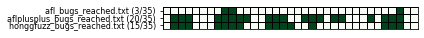

In [72]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

list_2D = []

for file_name in file_names:
    #print(list_2D)
    list_2D.append([value for value in get_bug_reached_info(file_name).values()])
#print(np.array(list_2D))

bugs = np.array(list_2D)

fig, ax = plt.subplots()

#ax.set_title("Bugs reached by each fuzzer")
fig.tight_layout()
plt.yticks(list([x+.5 for x in range(len(file_names))]), 
           [f"{file_name} ({str(count_bugs_reached(file_name))}/{len(bugs[0])})" for file_name in file_names],
          fontsize=8)
# remove x ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.pcolormesh(bugs, cmap=plt.get_cmap("Greens"), edgecolors='k', linewidth=1)
ax = plt.gca()
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("evaluation.svg", bbox_inches='tight')
plt.show()

### Percentage of Bugs reached

In [70]:
for file_name in file_names:
    print(f"{file_name}: {percentage_bugs_reached(file_name)}%")

honggfuzz_bugs_reached.txt: 42.857142857142854%
aflplusplus_bugs_reached.txt: 57.14285714285714%
afl_bugs_reached.txt: 8.571428571428571%


### Information on specific bug

In [66]:
bug_number = 9
list_of_bug_ids = [key for key in get_bug_reached_info(file_names[0]).keys()]
print(f"bug with the ID {list_of_bug_ids[bug_number]} found by:")
for file_name in file_names:
    if is_reached(file_name, list_of_bug_ids[bug_number]):
        print(file_name)

bug with the ID 85287269 found by:
honggfuzz_bugs_reached.txt
aflplusplus_bugs_reached.txt
afl_bugs_reached.txt
